## Installing Libraries

In [ ]:
!pip install darts

## Importing required Libraries

In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
# from darts import TimeSeries
# from darts.models import ExponentialSmoothing

## Dataset

In [ ]:
# importing the dataset
df = pd.read_csv('processed_data.csv')
df.head()

,Unnamed: 0,District,Event,Circle,Police Station,Caller Source,Event Type,Event Sub-Type,Latitude,Longitude,date,time
0,0,LUCKNOW,P01042100004,C1,PS1,PHONE,Information Against Police,Misbehavior By Prv,26.834,81.008,01-04-2021,00:00:00
1,1,LUCKNOW,P01042104316,C1,PS1,PHONE,Threat In Person,Attack,26.828,81.014,01-04-2021,12:09:00
2,2,LUCKNOW,P01042104847,C1,PS1,PHONE,Dispute,Dispute In Hospital,26.840,81.009,01-04-2021,12:51:00
3,3,LUCKNOW,P01042105074,C1,PS1,PHONE,Gambling,Play Cards,26.828,81.002,01-04-2021,13:10:00
4,4,LUCKNOW,P01042105152,C1,PS1,PHONE,Threat In Person,Attack,26.834,81.033,01-04-2021,13:18:00


In [ ]:
# index name and removing first column
df = df.iloc[:,1:]
df.index.name = 'id'
# removing unnecessary columns
df.drop(['District','Event'],axis=1,inplace=True)
df.head()

,Circle,Police Station,Caller Source,Event Type,Event Sub-Type,Latitude,Longitude,date,time
id,,,,,,,,,
0,C1,PS1,PHONE,Information Against Police,Misbehavior By Prv,26.834,81.008,01-04-2021,00:00:00
1,C1,PS1,PHONE,Threat In Person,Attack,26.828,81.014,01-04-2021,12:09:00
2,C1,PS1,PHONE,Dispute,Dispute In Hospital,26.840,81.009,01-04-2021,12:51:00
3,C1,PS1,PHONE,Gambling,Play Cards,26.828,81.002,01-04-2021,13:10:00
4,C1,PS1,PHONE,Threat In Person,Attack,26.834,81.033,01-04-2021,13:18:00


## Date vs Count

In [ ]:
# creating date_Count datarame
dates = []
counts = []
for day in df['date']:
    if day not in dates:
        dates.append(day)
        counts.append(1)
    else:
        counts[dates.index(day)] += 1

date_count = pd.DataFrame({
    'Date':dates,
    'No of Crimes':counts
})
date_count.head()

,Date,No of Crimes
0,01-04-2021,71
1,02-04-2021,64
2,03-04-2021,65
3,04-04-2021,79
4,05-04-2021,71


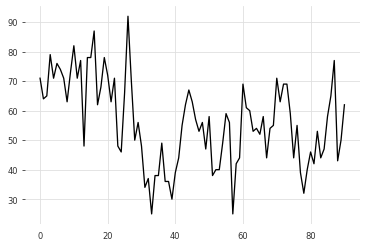

In [ ]:
# date vs count plot
plt.plot(date_count['No of Crimes'])

In [ ]:
# ensuring no irregularities in dates
for i in range(date_count.shape[0]):
    print(date_count['Date'][i],date_count['No of Crimes'][i])

01-04-2021 71
02-04-2021 64
03-04-2021 65
04-04-2021 79
05-04-2021 71
06-04-2021 76
07-04-2021 74
08-04-2021 71
09-04-2021 63
10-04-2021 73
11-04-2021 82
12-04-2021 71
13-04-2021 77
14-04-2021 48
15-04-2021 78
16-04-2021 78
17-04-2021 87
18-04-2021 62
19-04-2021 68
20-04-2021 78
21-04-2021 72
22-04-2021 63
23-04-2021 71
24-04-2021 48
25-04-2021 46
26-04-2021 66
27-04-2021 92
28-04-2021 70
29-04-2021 50
30-04-2021 56
01-05-2021 48
02-05-2021 34
03-05-2021 37
04-05-2021 25
05-05-2021 38
06-05-2021 38
07-05-2021 49
08-05-2021 36
09-05-2021 36
10-05-2021 30
11-05-2021 39
12-05-2021 44
13-05-2021 55
14-05-2021 62
15-05-2021 67
16-05-2021 63
17-05-2021 57
18-05-2021 53
19-05-2021 56
20-05-2021 47
21-05-2021 58
22-05-2021 38
23-05-2021 40
24-05-2021 40
25-05-2021 49
26-05-2021 59
27-05-2021 56
28-05-2021 25
29-05-2021 42
30-05-2021 44
31-05-2021 69
01-06-2021 61
02-06-2021 60
03-06-2021 53
04-06-2021 54
05-06-2021 52
06-06-2021 58
07-06-2021 44
08-06-2021 54
09-06-2021 55
10-06-2021 71
11-06-

In [ ]:
# convert to datetime object and save
date_count['Date'] = pd.to_datetime(date_count['Date'],format='%d-%m-%Y')
date_count.to_csv('dates_vs_crimecounts_dateform.csv')

## Forecasting

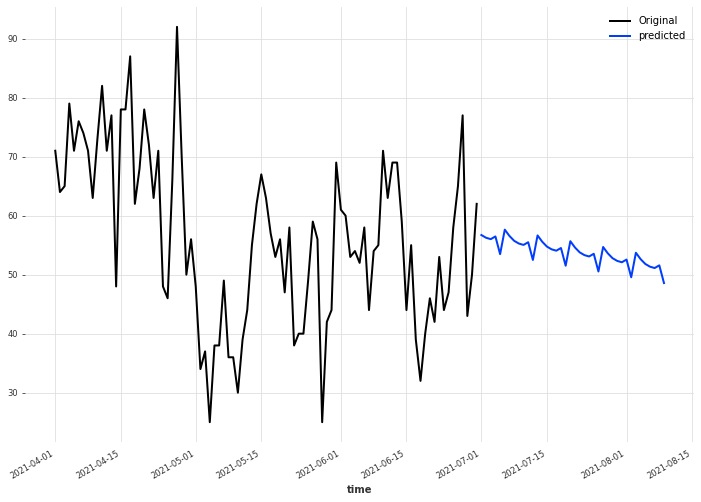

In [ ]:
# creating darts series
series = TimeSeries.from_dataframe(date_count,'Date','No of Crimes')

# fitting model
model = ExponentialSmoothing()
model.fit(series)

# next n predictions
predictions = model.predict(40)

# visualization
plt.figure(figsize=(12,8))
series.plot(label='Original')
predictions.plot(label='predicted')
plt.show()

In [ ]:
# series to numpy and reshape predictions
predictions = predictions.values().reshape(-1)
preds = pd.DataFrame({    
    'id':np.arange(91,131),
    'count':predictions
})
actual = pd.DataFrame({
    'id':np.arange(0,91),
    'count':date_count['No of Crimes']
})

# merge predictions with actual
forecast = actual.append(preds,ignore_index=True)

# save dataframe to csv
forecast.to_csv('forecast.csv')

## Long Lat Density

In [ ]:
# lat long mat
lat_lon_mat = df[['Latitude','Longitude']]
dense = lat_lon_mat[(lat_lon_mat['Latitude'] >= 26.8) & (lat_lon_mat['Latitude'] <= 27.5)]
dense = dense[(dense['Longitude'] <= 81.2) & (dense['Longitude'] > 80.5)]

# visualize
colorscale = ['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]
fig = ff.create_2d_density(
    dense['Longitude'], dense['Latitude'], colorscale=colorscale,
    hist_color='rgba(13, 13, 252, 0.8)', point_size=3
)
fig.show()